# Linear Regression 
## Bike Sharing Assignment


### The steps we follows are :
1. Reading, Understanding and visualising the data.
2. Preparing the data for modelling(train-test split, rescaling etc.)
3. Training the model.
4. Residual Analysis.
5. Predictions and Evaluation on the test set.

##  1. Reading, Understanding and visualising the data.

In [1]:
# importing required libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing and loading Dataset.
df = pd.read_csv(r"C:\Users\Parmesh Kademani\Downloads\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking shape of the data.
df.shape

(730, 16)

In [4]:
# Checking the Dtype and null values of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking every details of the data.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Convertion of variables like 'weathersit' and 'season' have values as 1, 2, 3 and 1, 2, 3, 4 which have specific labels associated with it.
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Misty', 3:'Light Rain'}))
df[['season']] = df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Dropping the irrelevant columns.
df = df.drop(columns = ["instant", "dteday", "registered", "casual"])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


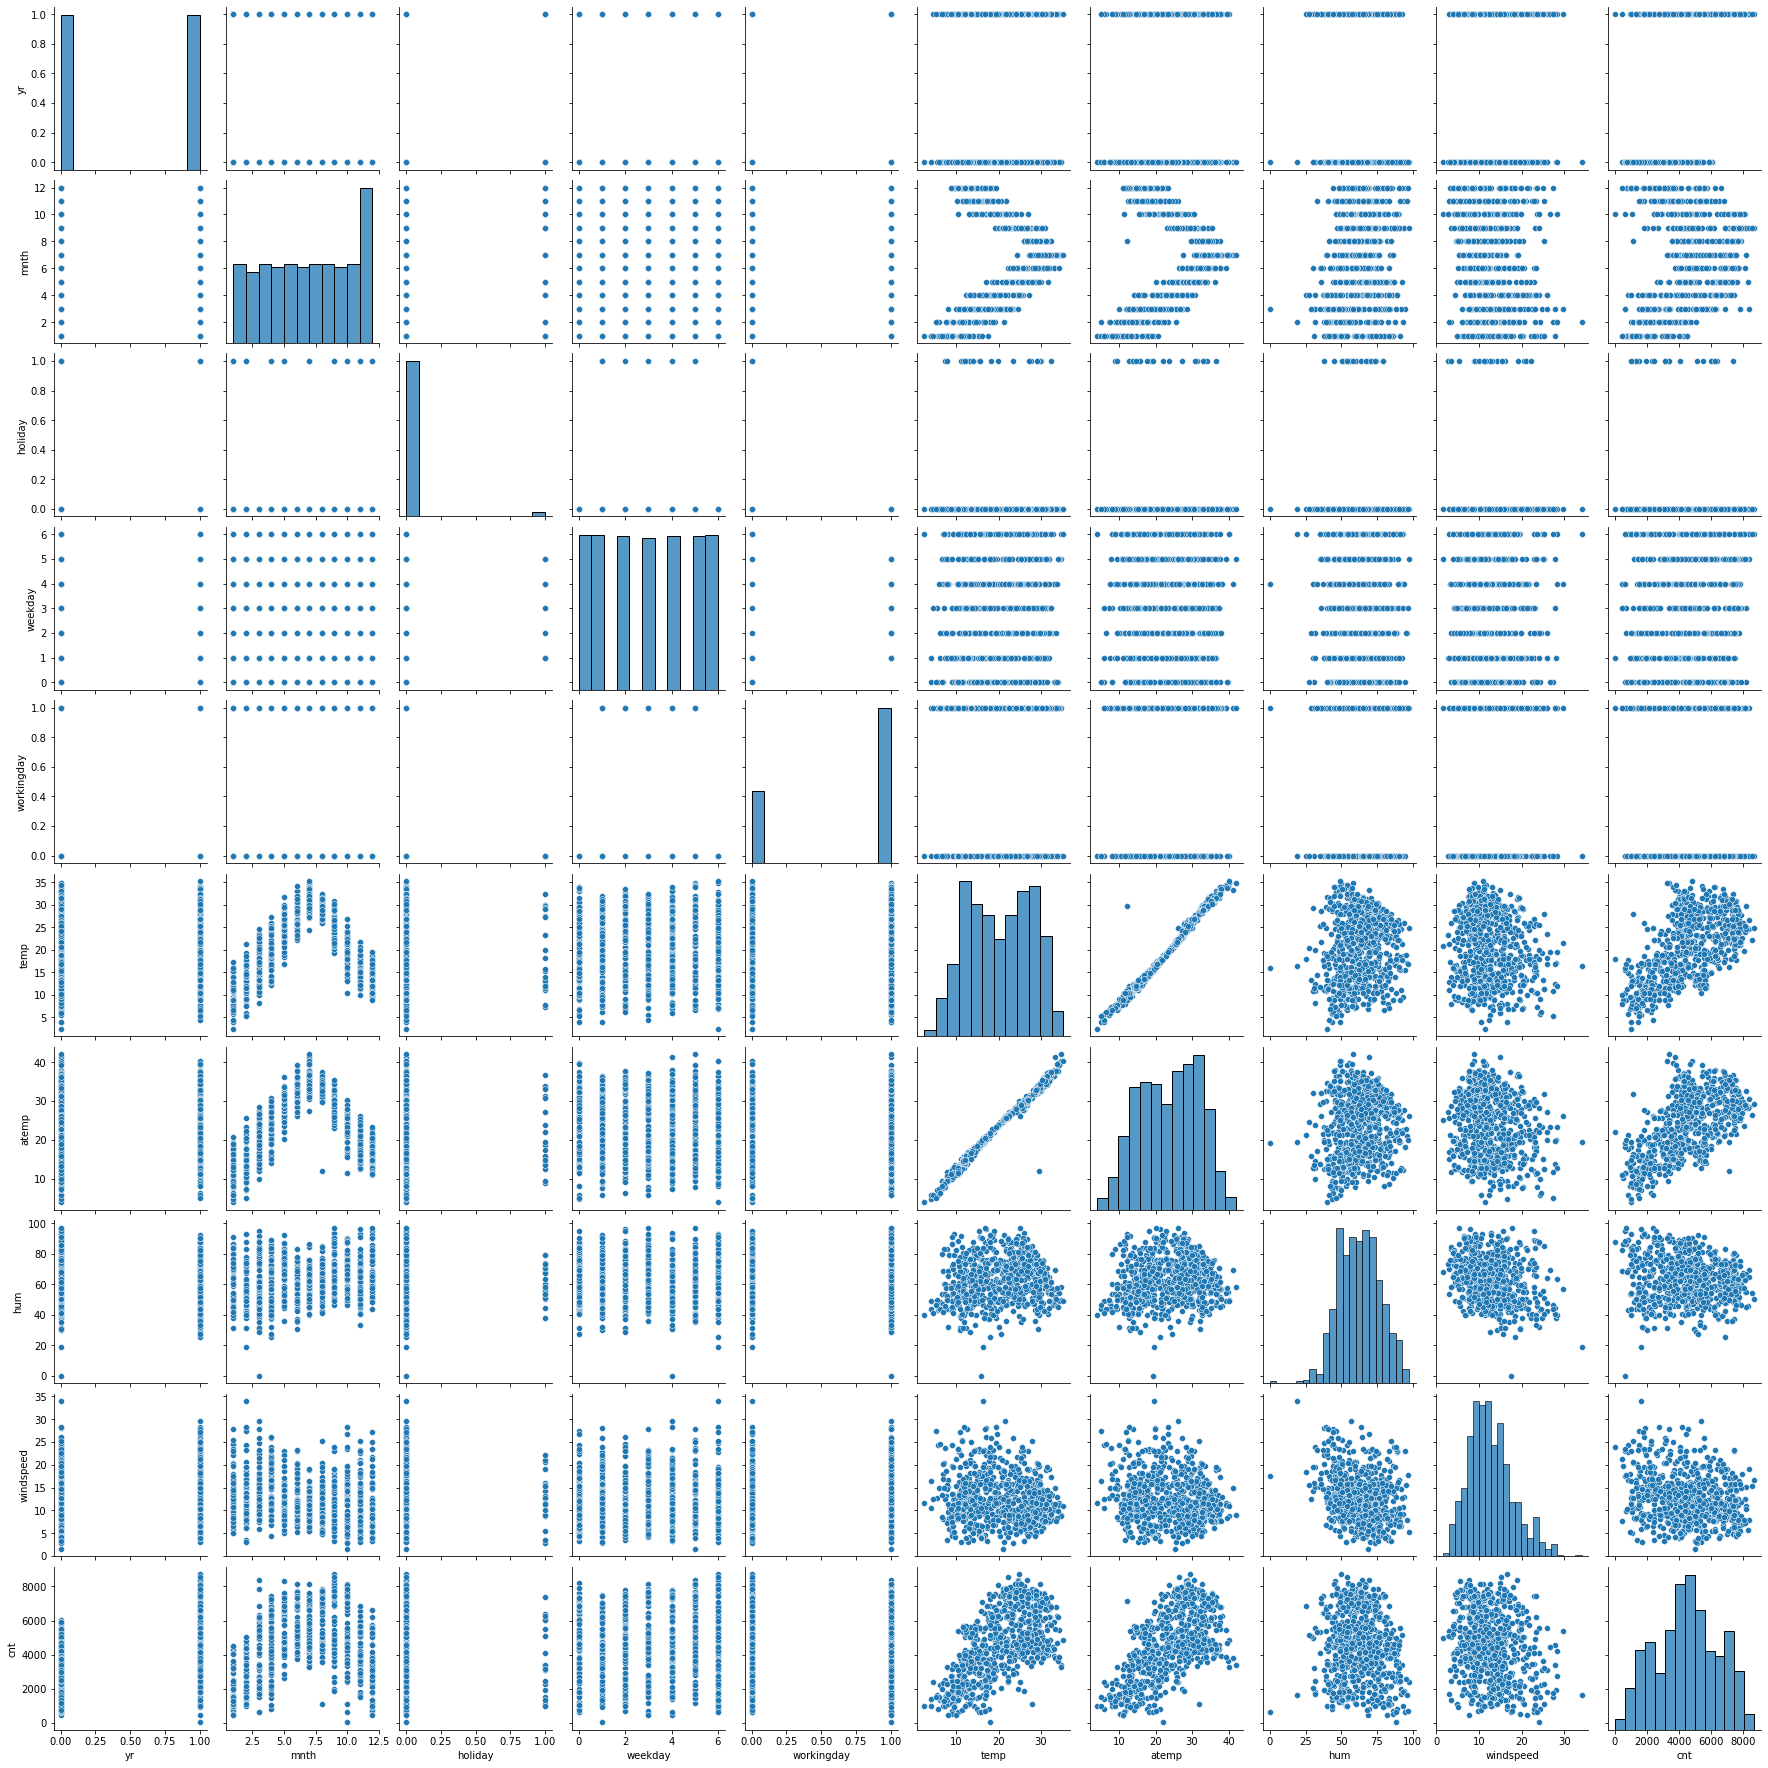

In [8]:
# Visualising the numerical variables in the dataset.
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

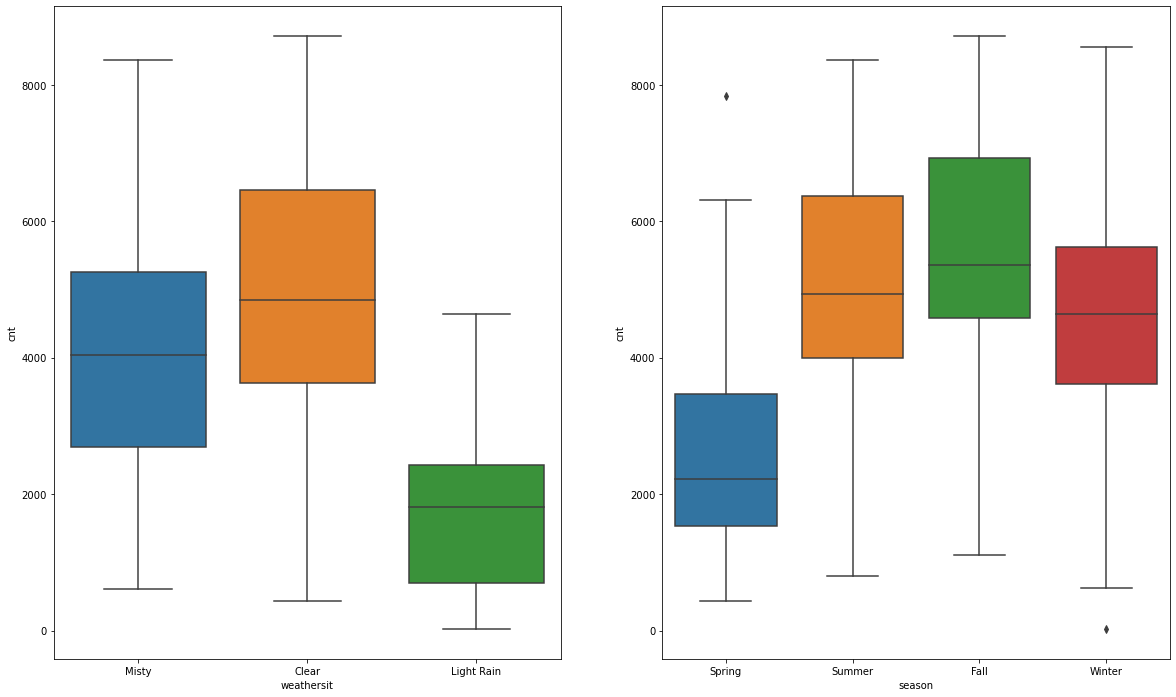

In [9]:
# Visualising the categorical variables in the dataset.
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1) #total 1 rows in plot ,total 2 columns in rows , 1st index of current plot
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(1,2,2) #total 1 rows in plot ,total 2 columns in rows , 2nd index of current plot
sns.boxplot(x = 'season', y = 'cnt', data = df)

## 2. Preparing the data for modelling(train-test split, rescaling etc.)

In [10]:
df.weathersit.value_counts()

Clear         463
Misty         246
Light Rain     21
Name: weathersit, dtype: int64

In [11]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [12]:
# Creating Dummy variables with k-1 columns where k = number of individual unique value.
status = pd.get_dummies(df['weathersit'])
status.head()

,Clear,Light Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
# Removing the first column as it is not required or an extra step.
status = pd.get_dummies(df['weathersit'], drop_first = True)
status.head()

,Light Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [14]:
status1 = pd.get_dummies(df['season'])
status1.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [15]:
status1 = pd.get_dummies(df['season'], drop_first = True)
status1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
# Concatenating it to the original Dataframe and dropping the original Column as it is no longer need and is redundant.
df = pd.concat([df, status, status1], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Light Rain,Misty,Spring,Summer,Winter
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [17]:
df = df.drop(columns = ["weathersit", "season"])
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Misty,Spring,Summer,Winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [18]:
# Building the model by train-test split.
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


In [19]:
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Misty,Spring,Summer,Winter
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,2659,0,1,0,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2,0,0,0,10.899153,13.22605,68.7917,11.791732,2947,0,1,1,0,0
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,0,1
127,0,5,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,0,1,0
640,1,10,0,3,1,26.957500,29.95665,79.3750,4.458569,7572,0,1,0,0,1


In [20]:
# Scaling Train data using MinMaxScaler(MinMaxScaler scales data between 0 and 1)
num_vars = ['mnth','weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

<ipython-input-20-bc55b912bae8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Parmesh Kademani\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Misty,Spring,Summer,Winter
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [21]:
df_train[num_vars].describe()

,mnth,weekday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504456,0.498366,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.315338,0.336182,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.545455,0.500000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


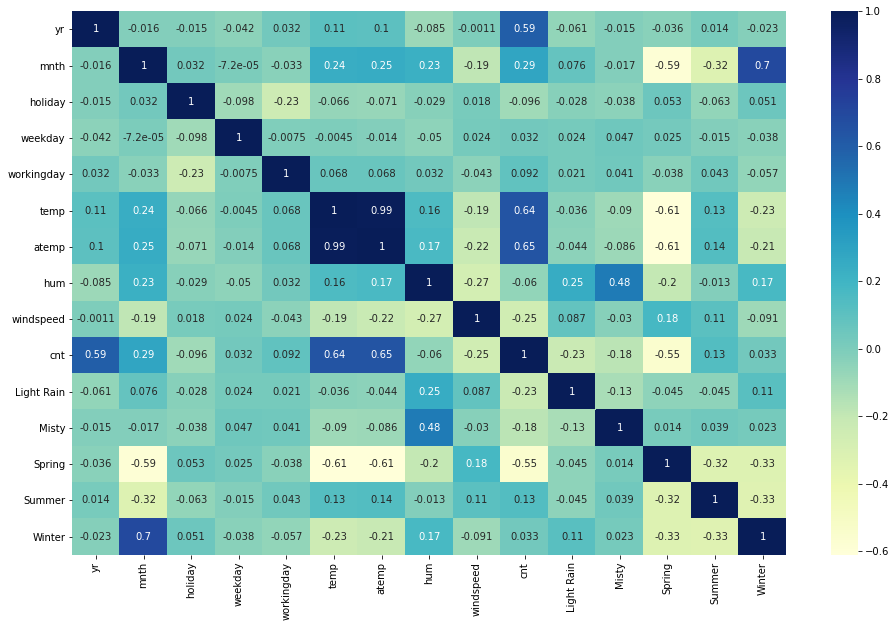

In [22]:
# Visualising Correlation between different Variables

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 3. Training/Building the Model

In [23]:
#Initilize the Linear Regression Model.
#Creating y_train(Target variable) and X_train(all other independent variables).
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
# RFE(Recursive Feature Elimination).
# Use RFE(Recursive Feature Elimination) to limit the variables.

#Initilzing RFE and giving number of features to select.
#Fit the data to RFE
#I took 14 columns in RFE, as the columns are more,  we can better practice to understand.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [25]:
# Selecting the suitable Columns based on rankings from RFE.
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Rain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [26]:
#Columns that were selcted by RFE
num_vars = X_train.columns[rfe.support_]
X_train_lm = X_train[num_vars]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm

,const,yr,holiday,weekday,temp,atemp,hum,windspeed,Light Rain,Misty,Spring,Summer,Winter
653,1.0,1,0,0.333333,0.509887,0.501133,0.575354,0.300794,0,0,0,0,1
576,1.0,1,0,0.333333,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,1.000000,0.442393,0.438975,0.640189,0.255342,0,1,1,0,0
728,1.0,1,0,0.000000,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0
482,1.0,1,0,1.000000,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.166667,0.824514,0.762183,0.605840,0.355596,0,1,0,1,0
578,1.0,1,0,0.666667,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.500000,0.202618,0.218747,0.435939,0.111379,0,0,1,0,0
350,1.0,0,0,1.000000,0.248216,0.223544,0.577930,0.431816,0,1,0,0,1


In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed',
       'Light Rain', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [28]:
# Columns that were not selected by RFE
X_train.columns[~rfe.support_]


Index(['mnth', 'workingday'], dtype='object')

In [29]:
X_train_rfe = X_train[col]

In [30]:
# Taking RFE selected features and adding Constant to it.
X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# Initilize a OLS(Ordinary Least Squares regression) using updated X_train and y_train and fit the model.
# Once fitted, we can use an inbuilt method called summary() to check p value, R^2 value and other important values.
lm = sm.OLS(y_train,X_train_rfe).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.57e-184
Time:                        22:13:22   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.036      7.193      0.0

In [33]:
# Calculate the VIFs for the model.
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
3,temp,377.51
4,atemp,366.59
5,hum,27.12
6,windspeed,4.90
9,Spring,3.91
11,Winter,3.23
2,weekday,3.12
10,Summer,2.35
8,Misty,2.28
0,yr,2.08


In [34]:
# you will use two main parameters to judge the insignificant variables, the p-values and the VIFs.
# We generally want a VIF and p value should be less than 5. So there are clearly some variables we need to drop.

# we could have :
#- high p-value, high VIF
# - high-low :
#    - high p-value, low VIF : remove these first
#    - low p-value, high VIF : remove these after the ones above
# - low p, low VIF

In [35]:
# Dropping atemp column ,because it has both p value and vif value greater than 5, so it is not required for prediction.
X_train_lm = X_train_lm.drop('atemp', axis=1)

In [36]:
# create another model
X_train_lm_sm = sm.add_constant(X_train_lm)

# create model
lm = sm.OLS(y_train, X_train_lm_sm)

# fit
lm_model = lm.fit()

# Summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.38e-185
Time:                        22:13:22   Log-Likelihood:                 493.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     498   BIC:                            -912.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2597      0.036      7.194      0.000       0.189       0.331
yr             0.2323      0.008     27.719      0.000       0.216       0.249
holiday       -0.0768      0.026     -2.908      0.004      -0.129      -0.025
weekday        0.0478      0.012      3.844      0.000       0.023       0.072
temp           0.4946      0.034     14.475      0.000       0.427       0.562
hum           -0.1246      0.039     -3.208      0.001      -0.201      -0.048
windspeed     -0.1822      0.027     -6.866      0.000      -0.234      -0.130
Light Rain    -0.2474      0.027     -9.091      0.000      -0.301      -0.194
Misty         -0.0577      0.011     -5.299      0.000      -0.079      -0.036
Spring        -0.0745      0.020     -3.637      0.000      -0.115      -0.034
Summer         0.0436      0.014      3.168      0.002       0.017       0.071
Winter         0.0895      0.017      5.334      0.000       0.057       0.122
==============================================================================
Omnibus:                       77.673   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.954
Skew:                          -0.787   Prob(JB):                     1.54e-41
Kurtosis:                       5.523   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Calculate the VIFs for the new model.
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
4,hum,27.07
3,temp,15.34
5,windspeed,4.68
8,Spring,3.83
2,weekday,3.11
10,Winter,3.09
7,Misty,2.28
9,Summer,2.25
0,yr,2.08
6,Light Rain,1.24


In [38]:
# Dropping hum column , vif value is greater than 5 so it is not required for prediction.
X_train_lm = X_train_lm.drop('hum', axis=1)

In [39]:
# create another model
X_train_lm_sm = sm.add_constant(X_train_lm)

# create model
lm = sm.OLS(y_train, X_train_lm_sm)

# fit
lm_model = lm.fit()

# Summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.40e-184
Time:                        22:13:22   Log-Likelihood:                 488.39
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     499   BIC:                            -908.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.030      6.456      0.000       0.136       0.254
yr             0.2354      0.008     28.012      0.000       0.219       0.252
holiday       -0.0771      0.027     -2.892      0.004      -0.130      -0.025
weekday        0.0516      0.012      4.135      0.000       0.027       0.076
temp           0.4683      0.033     13.988      0.000       0.403       0.534
windspeed     -0.1572      0.026     -6.141      0.000      -0.208      -0.107
Light Rain    -0.2821      0.025    -11.195      0.000      -0.332      -0.233
Misty         -0.0781      0.009     -8.760      0.000      -0.096      -0.061
Spring        -0.0813      0.021     -3.958      0.000      -0.122      -0.041
Summer         0.0392      0.014      2.840      0.005       0.012       0.066
Winter         0.0786      0.017      4.740      0.000       0.046       0.111
==============================================================================
Omnibus:                       76.041   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.991
Skew:                          -0.779   Prob(JB):                     8.23e-40
Kurtosis:                       5.458   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Calculate the VIFs for the new model.
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
7,Spring,2.12
0,yr,2.07
8,Summer,1.81
9,Winter,1.68
6,Misty,1.54
5,Light Rain,1.08
1,holiday,1.05


## 4. Residual Analysis.

In [41]:
# Predicting the Y_train value(Count) using the model
y_train_pred = lm_model.predict(X_train_lm_sm)
y_train_pred

653    0.717538
576    0.787566
426    0.489465
728    0.359437
482    0.598635
         ...   
526    0.730163
578    0.839824
53     0.216684
350    0.295299
79     0.297890
Length: 510, dtype: float64

C:\Users\Parmesh Kademani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

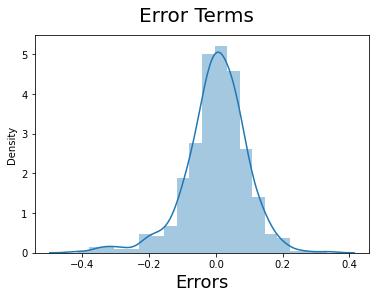

In [42]:
# Calculating Residual value
# Visualising the residual value to check if the model not failing any conditions, Mean should exactly fitting to zero.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## 5. Predictions and Evaluation on the test set.

In [43]:
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Misty,Spring,Summer,Winter
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,2659,0,1,0,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2,0,0,0,10.899153,13.22605,68.7917,11.791732,2947,0,1,1,0,0
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,0,1
127,0,5,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,0,1,0
640,1,10,0,3,1,26.957500,29.95665,79.3750,4.458569,7572,0,1,0,0,1


In [44]:
# create a list of numeric vars.
# fit on data
var_list = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']
df_test[var_list] = scaler.transform(df_test[var_list])

<ipython-input-44-cd8cff3f5de5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var_list] = scaler.transform(df_test[var_list])
C:\Users\Parmesh Kademani\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [45]:
# Extracting y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [46]:
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Rain,Misty,Spring,Summer,Winter
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0,1,0,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,0,0,1,0


In [47]:
#  Dropping all the Columns that we have dropped in the training of the model.
X_test = X_test.drop(['atemp', 'hum', "mnth", "workingday"], axis=1)
X_test.head()

,yr,holiday,weekday,temp,windspeed,Light Rain,Misty,Spring,Summer,Winter
184,0,1,0.166667,0.831783,0.084219,0,1,0,0,0
535,1,0,0.500000,0.901354,0.153728,0,0,0,1,0
299,0,0,0.666667,0.511964,0.334206,0,1,0,0,1
221,0,0,0.500000,0.881625,0.339570,0,0,0,0,0
152,0,0,0.666667,0.817246,0.537414,0,0,0,1,0


In [48]:
# Adding the constant to X_test and making Predictions to find y_pred value.
X_test_sm = sm.add_constant(X_test)

In [49]:
# predict
y_pred = lm_model.predict(X_test_sm)
y_pred

184    0.424472
535    0.893201
299    0.416947
221    0.580105
152    0.566681
         ...   
400    0.346232
702    0.724649
127    0.496894
640    0.797519
72     0.245384
Length: 219, dtype: float64

In [50]:
# Model Evaluation
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test,y_pred)
print(r_squared_train*100)
print(r_squared_test*100)

82.86851996149827
80.58777271560255


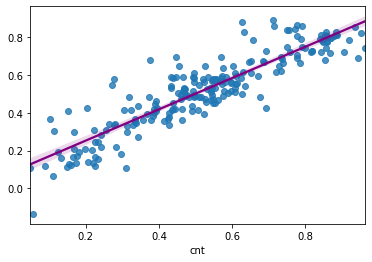

In [51]:
# Plotting Y_test vs Y_pred Scatter plot.
plt.figure()
sns.regplot(x=y_test, y=y_pred,fit_reg=True, line_kws={"color":"purple"})
plt.show()

In [52]:
round(lm_model.params,4)

const         0.1948
yr            0.2354
holiday      -0.0771
weekday       0.0516
temp          0.4683
windspeed    -0.1572
Light Rain   -0.2821
Misty        -0.0781
Spring       -0.0813
Summer        0.0392
Winter        0.0786
dtype: float64

In [53]:
# The Best Fit Line is (0.4636 +0.2183 year +(-0.0959) * holiday +  0.0326 * weekday + -0.1360 * windspeed + (0.3200) * casual + (-0.2346) * Light Rain + (-0.0663) * Misty + (-0.2386) * Spring +(-0.0531)*Summer )+ (-0.0477) * Winter.

In [54]:
# Calculating Adjusted-R^2 value for Train and Test a dataset
adjusted_r2_train = round(1-(1-r_squared_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_test = round(1-(1-r_squared_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_train)
print(adjusted_r2_test)

0.8238
0.7965
